## Assignment 4: Exploring Yelp Reviews

**NOTE: THIS ASSIGNMENT IS OPTIONAL**

You must complete **one** out of homeworks #4, #5, and #6.

**Due date: Monday, 11/1 by the end of day**

In this assignment, we'll explore restaurant review data available through the [Yelp Dataset Challenge](https://www.yelp.com/dataset/challenge). The dataset includes Yelp data for user reviews and business information for 10 metropolitan areas. The `data` directory in this repository includes data files for reviews and restaurants in 3 of these cities: Cleveland, Pittsburgh, and Charlotte. These cities were chosen since the data is not too large — the data for the other cities can be downloaded from the Yelp download page. For this assignment, you are welcome to analyze data any of the three cities. 

This assignment is broken into two parts:

#### Part 1: testing how well sentiment analysis works.

Because Yelp reviews include the number of stars given by the user, the Yelp data set provides a unique opportunity to test how well our sentiment analysis works by comparing the number of stars to the polarity of reviews.

#### Part 2: analyzing correlations between restaurant reviews and census data

We'll explore geographic trends in the restaurant reviews, comparing our sentiment analysis results with user stars geographically. We'll also overlay review stars on maps of household income (using census data).
    
#### Background readings
- [Does sentiment analysis work?](http://varianceexplained.org/r/yelp-sentiment/)
- [The Geography of Taste: Using Yelp to Study Urban Culture](https://www.mdpi.com/2220-9964/7/9/376/pdf/1)

## 1. Does Sentiment Analysis Work?

In this part, we'll load the data, perform a sentiment analysis, and explore the results.

### 1.1 Load review data

You can choose data from Cleveland, Charlotte, or Pittsburgh. The data is stored as a JSON file and you can use `pandas.read_json` to load it. 

**Notes**

The JSON data is in a "records" format. To load it, you'll need to pass the following keywords: 

- `orient='records'`
- `lines=True`

In [46]:
import pandas as pd
import textblob
import string #common punctuation
import nltk #common stop words (no, hasn, why)
nltk.download('stopwords');


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
#might need this too
#import datetime

In [48]:
#going with Charlotte

reviews= pd.read_json(r'C:\Users\brine\Documents\GitHub\MUSA_550\assignment-4-bri-ne\data\reviews_charlotte.json.gz', orient='records',lines=True )


In [49]:
reviews.head()

,business_id,review_id,stars,text
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...
2,ZCsvwa_dsqNB8d8tYHPdjw,ASZha3MiQJghtt3n5OGIsA,4,This random hole in the wall is located in the...
3,CGUK3cd2gxp2q3KPY19Oog,LrO2MkIWIjAoOeS5WImnrQ,5,Yum!! Had the kale grits and would definitely ...
4,xHZmM-kGXqOfmQNTm0T05g,m14cjbICuRRASAitrh_YXA,3,Overall the food is really good. We had brusch...


### 1.2 Format the review text

The first step is to split the review text into its individual words and make all of the words lower-cased.

Add a new column, called 'formatted_text', which each entry is a list of the lower-cased words in a review.

In [50]:
reviews["formatted_text"]= reviews["text"].str.lower()
#.str.split()


In [51]:
reviews.head()

,business_id,review_id,stars,text,formatted_text
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...,such a unique place & a great find. our waitre...
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...,easily entering my top 3 restaurants in charlo...
2,ZCsvwa_dsqNB8d8tYHPdjw,ASZha3MiQJghtt3n5OGIsA,4,This random hole in the wall is located in the...,this random hole in the wall is located in the...
3,CGUK3cd2gxp2q3KPY19Oog,LrO2MkIWIjAoOeS5WImnrQ,5,Yum!! Had the kale grits and would definitely ...,yum!! had the kale grits and would definitely ...
4,xHZmM-kGXqOfmQNTm0T05g,m14cjbICuRRASAitrh_YXA,3,Overall the food is really good. We had brusch...,overall the food is really good. we had brusch...


### 1.3 Review stop words

Use the `nltk` library to remove any stop words from the list of words in each review. 

Overwrite the 'formatted_text' column to contain a list of lower-cased words in each review, with no stop words. 

In [52]:
stop_words = list(set(nltk.corpus.stopwords.words('english')))

In [53]:
stop = stop_words

In [54]:
#getting rid of stop words
reviews["formatted_text"] = reviews["formatted_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [55]:
reviews.head(n=2)

,business_id,review_id,stars,text,formatted_text
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...,"unique place & great find. waitress funny, kno..."
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...,easily entering top 3 restaurants charlotte on...


In [56]:
import string

In [57]:
#using this fn that Nick provided, b/c strings like 'wow!' wouldn't drop punct
def remove_punctuation(sentence):
    """
    Remove punctuation from the input sentence.
    """
    translator = str.maketrans('', '', string.punctuation)
    return sentence.translate(translator)

In [58]:
#removing punctuation
reviews["formatted_text"] = [remove_punctuation(review)for review in reviews["formatted_text"]]

In [59]:
reviews.head(n=2)

,business_id,review_id,stars,text,formatted_text
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...,unique place great find waitress funny knowle...
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...,easily entering top 3 restaurants charlotte on...


### 1.4 Calculate polarity and subjectivity

Using the formatted text column, create a list of `textblob.TextBlob()` objects and then extract the `subjectivity` and `polarity`.

Add two new columns to the review DataFrame: `polarity` and `subjectivity`.

**Note: the polarity/subjectivity calculation can take several minutes to run**

In [60]:
blobs = [textblob.TextBlob(review)for review in reviews["formatted_text"]]

In [61]:
#checking it out
blobs[0].sentiment

Sentiment(polarity=0.40416666666666673, subjectivity=0.8416666666666667)

In [62]:
reviews["polarity"] = [blob.sentiment.polarity for blob in blobs]
reviews["subjectivity"] = [blob.sentiment.subjectivity for blob in blobs]

In [63]:
reviews.head(n=3)

,business_id,review_id,stars,text,formatted_text,polarity,subjectivity
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...,unique place great find waitress funny knowle...,0.404167,0.841667
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...,easily entering top 3 restaurants charlotte on...,0.508333,0.683333
2,ZCsvwa_dsqNB8d8tYHPdjw,ASZha3MiQJghtt3n5OGIsA,4,This random hole in the wall is located in the...,random hole wall located park rd shopping cent...,0.288910,0.546241


### 1.5 Comparing the sentiment analysis to number of stars 

Use `seaborn` to make two box plots, one showing the polarity vs number of user stars and one showing the subjectivity vs the number of user stars.

In [64]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Star Rating vs Subjectivity of Review')

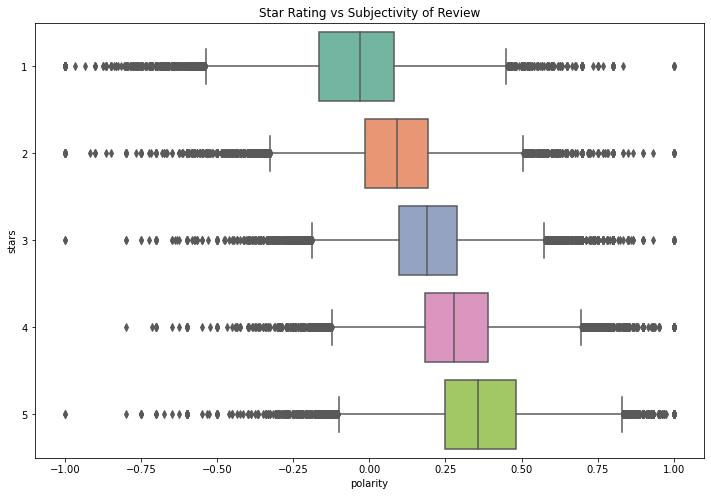

In [65]:
#Polarity Boxplot
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(y='stars', x='polarity', data=reviews, ax=ax, orient="h", palette="Set2").set_title("Star Rating vs Subjectivity of Review")


Text(0.5, 1.0, 'Star Rating vs Subjectivity of Review')

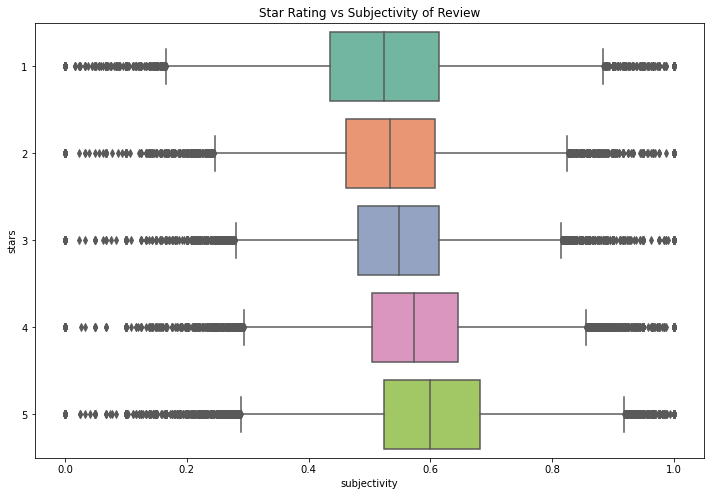

In [66]:
#Subjectivity Boxplot
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(y='stars', x='subjectivity', data=reviews, ax=ax, orient="h", palette="Set2").set_title("Star Rating vs Subjectivity of Review")


**Question:** What do your charts indicate for the effectiveness of our sentiment analysis?

## Answer 
It would make sense for polarity to increase with low and high star reviews. Our polarity plot shows this modestly for the 1 star reviews, and there is a increase in polarity as star rating increase. That make sense. Similarly, most of the reviews are shown to have subjectivity levvels greater than one. The nature of a review is subjective, so this also makes sense. however, there are a few reviews that show to have little to no subjectivity and there is variance between the number of stars a review has and its level of subjectivity. It's my assumption that all the reviews, no matter the star rating should show a similar level of subjectivty. Although, without any other reference it does seem like the reviews in the subjectivity box plot have somewhat similar spreads. As a result, it seems that our sentiment analysis is decently effective - though that's my subjective observation.   

### 1.6 The importance of individual words

In this part, we'll explore the importance and frequency of individual words in Yelp reviews.

We will identify the most common reviews and then plot the average polarity vs the user stars for the reviews where those words occur. 

#### 1.6.1 Select a random sample of the review data

Select 1,000 random rows from the DataFrame holding the review data. Use the `.sample()` function to perform the selection.

In [67]:
from random import sample

In [68]:
subset = reviews.sample(1000)

In [69]:
subset["formatted_text"] = subset["formatted_text"].str.split()

In [70]:
subset.head(n=3)

,business_id,review_id,stars,text,formatted_text,polarity,subjectivity
7534,R1jJQi2yR44D_2ileqr8kA,jeWHw92Ro8YIiqlS8851fw,4,"I loved the charm, atmosphere, spaciousness, a...","[loved, charm, atmosphere, spaciousness, clean...",0.168450,0.514663
67257,bXbCGFk3ZjLcTdQQB-xPyQ,cNZDJseiq-vltVH3ozELWA,5,I tried to think of some reason as to why I sh...,"[tried, think, reason, give, lucianos, 5, star...",0.438988,0.699952
176747,-wtdaWBWrUOXKCcGxzOtwA,X-oFzw-b6OZUTI45H-jNxQ,2,Food was mediocre. Service was terrible. The p...,"[food, mediocre, service, terrible, place, cro...",-0.150000,0.414286


#### 1.6.2 Re-format the data

Pass the subset of review data from the previous part to the `reshape_data()` function defined below. Explore the result of this function, and in one or two sentences, explain the operation performed by `reshape_data()`. 

In [71]:
def reshape_data(review_subset):
    """
    Reshape the input dataframe of review data.
    """
    from pandas import Series, merge
    
    X = (review_subset['formatted_text']
         .apply(Series)
         .stack()
         .reset_index(level=1, drop=True)
         .to_frame('word'))
    
    
    R = review_subset[['polarity', 'stars', 'review_id']]
    
    return merge(R, X, left_index=True, right_index=True).reset_index(drop=True)

In [72]:
reshaped = reshape_data(subset)

In [73]:
reshaped.head()

,polarity,stars,review_id,word
0,0.616667,5,7a8Srr4uIdA2Wz1fFI7QaA,loved
1,0.616667,5,7a8Srr4uIdA2Wz1fFI7QaA,atmosphere
2,0.616667,5,7a8Srr4uIdA2Wz1fFI7QaA,here
3,0.616667,5,7a8Srr4uIdA2Wz1fFI7QaA,friend
4,0.616667,5,7a8Srr4uIdA2Wz1fFI7QaA,ice


**Question:** what is the operation performed by the `reshape_data()` function?

## Answer 
Our formatted text column, from the sampled down reviews df, is first turned into a ndarray, or a series. Then, the array is stacked to convert the column '0' rowise. Next, the index is reset with the col 1 (really the second column) being identified as the index to drop. Then, the series is converted to a df and it is renamed 'word'.

Finally, only the polarity, stars, review_id, and word columns are selected.

#### 1.6.3 Calculate the average number of stars and polarity for each word

Using the result from 1.6.2, group by the "word" column, and calculate the following three quantities:
1. the size of each group 
1. the average number of user stars for each word
1. the average polarity for each word

Combine these three results into a single DataFrame object.  

**Hint:** you can combine the three results using either the `pandas.concat()` or the `pandas.merge()` function.

In [74]:
#Getting size of word groups
sizeword=reshaped.groupby(by="word", as_index=False).size()

In [75]:
stars = reshaped.groupby(by="word", as_index=False).mean("stars").round(decimals=2).drop(columns="polarity")

In [76]:
polarity = reshaped.groupby(by="word", as_index=False).mean("polarity").round(decimals=2).drop(columns="stars")


In [77]:
z = sizeword.merge(stars, on="word")
reviewstats = z.merge(polarity, on="word")
reviewstats.head(n=20)

,word,size,stars,polarity
0,0,2,1.50,0.15
1,01,1,4.00,0.28
2,050,1,2.00,0.00
3,1,36,3.64,0.24
4,10,41,2.98,0.08
5,100,6,4.33,0.22
6,1000,1,2.00,0.24
7,101,1,4.00,0.44
8,1010,1,5.00,0.46
9,1014,1,3.00,0.26


In [78]:
#getting rid of the numbers in the word column
reviewstats["word"] = reviewstats["word"].astype(str)
number = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
reviewstats = reviewstats[~reviewstats.word.str.contains('|'.join(number))]

In [79]:
reviewstats.head()

,word,size,stars,polarity
210,a,5,4.4,0.31
212,aarp,1,5.0,0.27
213,abandoned,2,4.0,0.17
214,abbey,1,3.0,0.19
215,ability,1,1.0,0.14


#### 1.6.4 Select words the occur at least 50 times in reviews

Trim your DataFrame from the last section to only include words that occurred at least 50 times. Remember, when you grouped by the 'word' column, the `size()` function told you how many times each word occurred. 

In [80]:
atleast50 = reviewstats.loc[reviewstats["size"]>49]
atleast50.head()


,word,size,stars,polarity
319,again,70,3.26,0.14
373,almost,55,3.45,0.19
381,also,231,3.80,0.23
387,always,159,4.21,0.28
394,amazing,102,4.50,0.36


#### 1.6.5 Plot the average polarity vs user stars

Use `matplotlib` to make a scatter plot of the average user stars vs average polarity for the words in the data frame from the last section. This will involve two steps:

Loop over each row of the data frame from the last section and for each row:

1. Use `plt.scatter(x, y)` to plot a scatter plot, where x is polarity and y is stars. 
1. Use `plt.text(x, y, word)` to add the corresponding word to each scatter marker.

Using the data frame from section 1.4, add vertical and horizontal lines to your chart that shows the average number of user stars and the average polarity across all reviews in the data set. 

Make sure the figure is big enough so that you can make out some of the words, especially at low and high polarity values. You should be able to see a strong trend between polarity and user stars, and some of the most common words occurring in these reviews. 

In [81]:
from matplotlib import pyplot as plt

In [82]:
#s = reviewstats["word"]
#plt.text(reviewstats["polarity"], reviewstats["stars"],s)

In [93]:
word = reviewstats["word"]
word

210                                                    a
212                                                 aarp
213                                            abandoned
214                                                abbey
215                                              ability
                              ...                       
7690                                               zones
7691                                              zuccas
7692                                            zucchini
7693     日曜日の夜であったにもかかわらず席は満席で、ローカルの人気レストランのようでした。また行こう。
7694    暗めの照明でステーキとシーフードが美味しいお店。地ビールやワインも揃っていてディナーを楽しめます
Name: word, Length: 7477, dtype: object

KeyError: 'a'

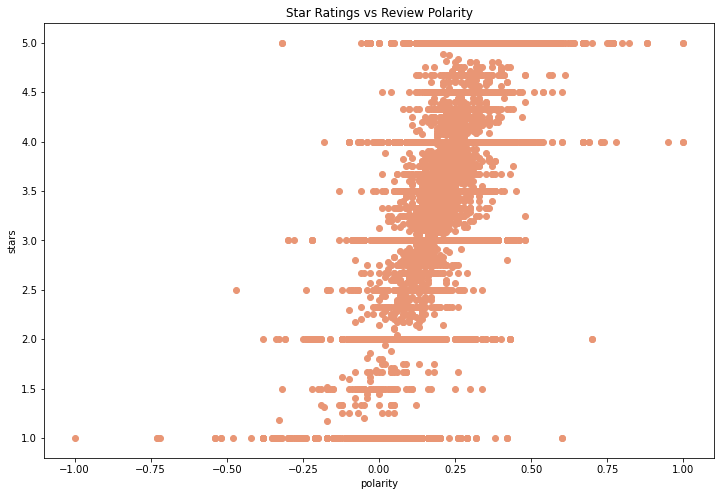

In [84]:

x = reviewstats["polarity"]
y = reviewstats["stars"]
#s = reviewstats["word"]

fig= plt.subplots(figsize=(12,8))

for row in reviewstats: 
    plt.scatter(reviewstats["polarity"], 
                reviewstats["stars"], 
                color='#e99675')
    plt.xlabel("polarity")
    plt.ylabel("stars")
    plt.title("Star Ratings vs Review Polarity")
    for wor in reviewstats["word"]:
        plt.text(x[wor], y[wor], wor)
    #plt.text(x[row],y[row], "stinky")
        

In [105]:
for word in reviewstats["word"]: 
    print(word)

a
aarp
abandoned
abbey
ability
able
abound
about
above
abroad
absinthe
absolute
absolutely
absorbing
absurd
abundance
abundant
abusive
abysmal
accept
acceptable
accepted
access
accessible
accident
accommodate
accommodating
accompanied
accompanying
accomplish
accord
according
accordingly
accordion
account
accountability
accurate
accustomed
acid
acknowledge
acknowledged
acoustics
acquired
acres
across
act
acted
action
actionnot
actions
active
activities
activity
actors
actual
actually
ad
adaptation
add
added
addict
addicted
addicting
adding
addition
additional
additionally
additions
address
addressed
adequate
adjacent
adjustment
admit
admittedly
adopted
adorable
adore
adult
adults
advance
advanced
advantage
adventure
adventurous
advertise
advertised
advertises
advice
advisable
advise
advised
aesthetic
affairs
afficianado
affirmation
affirmed
affordability
affordable
aficionados
afield
afraid
after
aftermath
afternoon
aftertaste
afterwards
afterwork
again
againmeat
againmore
against
again

euro
evaporated
eve
even
evening
evenings
event
events
eventually
ever
everchanging
everelusive
everpresent
every
everybody
everyday
everyone
everyones
everything
everytime
everywhere
evident
evidently
evoking
evoo
ew
exact
exactly
exaggerate
example
exasperated
exboyfriend
exceed
exceeded
excellent
except
exception
exceptional
exceptionally
excited
excitement
exciting
exclusive
exclusives
excusable
excuse
excuses
executed
execution
executive
exist
existed
exit
exorbitant
expand
expanded
expect
expectation
expectations
expected
expecting
expects
expensive
experience
experienced
experiences
experiencewas
experiencing
experimented
expert
expire
expired
explain
explained
explains
exploration
explosion
explosive
exposed
express
expressed
expresso
exquisite
exquisitego
extend
extensive
exterior
extra
extraordinary
extravagant
extravaganza
extremely
extremes
eye
eyed
eyes
eying
f
fabulous
fabulously
facade
face
facebook
facelift
faces
facet
facility
facing
fact
factor
factory
fail
failed
fai

pickleville
pickling
pickup
pickups
picky
picnic
pico
pics
picture
pictures
pie
piece
pieces
pies
pig
pigeons
piggish
pile
piled
piling
pillar
pillow
pimento
pinball
pine
pineapple
pineville
pink
pint
pinto
pints
pinwheel
piper
pisces
pissed
pistachio
pistachioraspberry
pistanchio
pit
pita
pitas
pitched
pits
pittsburgh
pixie
pizza
pizzaand
pizzas
place
placeand
placed
places
placesbut
placing
plain
plainfeels
plaintains
plan
planet
planning
plans
plant
plantain
plantains
plastic
plate
plates
platform
plating
platter
play
played
players
playground
playhouse
playing
playinggood
playingwe
playlist
playoff
plaza
pleasant
pleasantly
please
pleased
pleasure
plentiful
plenty
plethora
pljeskavica
plop
plump
plus
pm
po
poboy
poboys
poched
pocket
point
pointed
pointing
points
poke
pokebowl
poker
pokerito
pokeritos
poki
polenta
policy
polished
polite
politely
politeness
pollo
polynesian
pommes
pond
poo
pool
poor
poorly
pop
popcorn
popeyes
popped
poppers
poppy
poppys
poptarts
popular
porch
porchet

violently
vip
vips
virtually
viscous
visibly
vision
visit
visited
visiting
visitor
visitors
visits
visitsif
viva
vivace
vodka
voice
voiced
volcano
volnay
volume
vote
voted
voting
voucher
vowed
vs
w
waaayyy
wabbit
wadhorn
waffle
waffles
wagyu
waist
waistaff
wait
waited
waiter
waiters
waiterwaitress
waiting
waitlist
waitress
waitresses
waitresseswaiters
waitressproblemshe
waitresss
waitstaff
wales
walgreens
walk
walkable
walked
walking
wall
wallet
wallets
walls
wally
walmart
walnut
wanna
wans
want
wanted
wanting
wants
ward
warm
warmed
warmer
warned
warning
warrants
was
wash
washed
washing
washington
wasnt
wasstandard
waste
wasted
wasting
waswell
watch
watched
watching
water
watered
waterfall
waters
watery
wave
waved
way
ways
wayyy
we
weak
wearing
weary
weather
website
wed
wedding
wednesday
wednesdays
week
weekday
weekend
weekends
weekly
weeknight
weeks
weight
weird
weiss
welcome
welcomed
welcomes
welcoming
well
welldone
wellfed
wellhuge
welli
wellington
wellingtons
wellmad
wellmade
wellm

In [121]:
wordlist = reviewstats["word"].tolist()
wordlist

['a',
 'aarp',
 'abandoned',
 'abbey',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absinthe',
 'absolute',
 'absolutely',
 'absorbing',
 'absurd',
 'abundance',
 'abundant',
 'abusive',
 'abysmal',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accident',
 'accommodate',
 'accommodating',
 'accompanied',
 'accompanying',
 'accomplish',
 'accord',
 'according',
 'accordingly',
 'accordion',
 'account',
 'accountability',
 'accurate',
 'accustomed',
 'acid',
 'acknowledge',
 'acknowledged',
 'acoustics',
 'acquired',
 'acres',
 'across',
 'act',
 'acted',
 'action',
 'actionnot',
 'actions',
 'active',
 'activities',
 'activity',
 'actors',
 'actual',
 'actually',
 'ad',
 'adaptation',
 'add',
 'added',
 'addict',
 'addicted',
 'addicting',
 'adding',
 'addition',
 'additional',
 'additionally',
 'additions',
 'address',
 'addressed',
 'adequate',
 'adjacent',
 'adjustment',
 'admit',
 'admittedly',
 'adopted',
 'adorable',
 'adore',
 'adult',
 'a

In [ ]:

xs = reviewstats["polarity"]
ys = reviewstats["stars"]
#s = reviewstats["word"]

fig= plt.subplots(figsize=(12,8))

for row in reviewstats: 
    plt.scatter(reviewstats["polarity"], 
                reviewstats["stars"], 
                color='#e99675')
    plt.xlabel("polarity")
    plt.ylabel("stars")
    plt.title("Star Ratings vs Review Polarity")
    for x,y in zip(xs,ys): 
        for word in reviewstats["word"]:
            label=word
            plt.annotate(label, # this is the text
                         (x,y))
            #, # these are the coordinates to position the label
             #            textcoords="offset points", # how to position the text
              #           xytext=(0,10), # distance from text to points (x,y)
               #          ha='center')

KeyError: 0

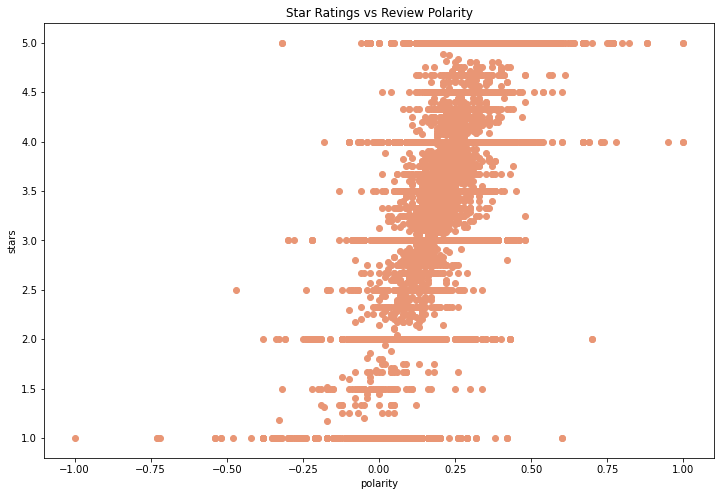

In [91]:

x = reviewstats["polarity"]
y = reviewstats["stars"]
#s = reviewstats["word"]

fig= plt.subplots(figsize=(12,8))

for row in reviewstats: 
    plt.scatter(reviewstats["polarity"], 
                reviewstats["stars"], 
                color='#e99675')
    plt.xlabel("polarity")
    plt.ylabel("stars")
    plt.title("Star Ratings vs Review Polarity")
    for i in range(0, len(x)):
        plt.text(x[i], y[i], word[i])
    #plt.text(x[row],y[row], "stinky")
        

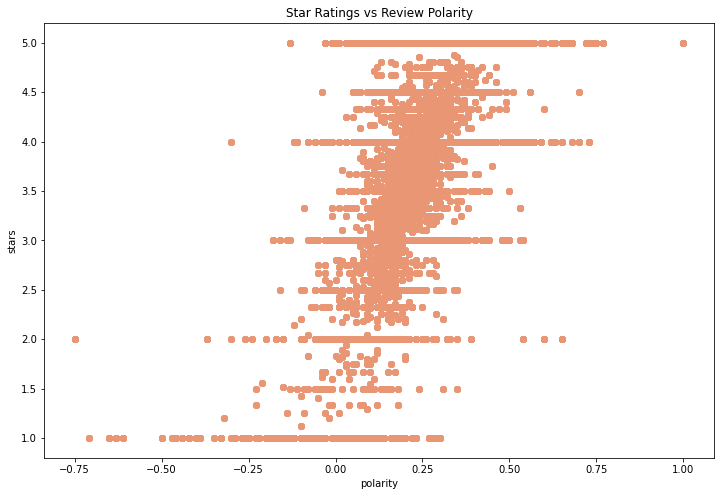

In [44]:

fig= plt.subplots(figsize=(12,8))

for row in reviewstats: 
    plt.scatter(reviewstats["polarity"], 
                reviewstats["stars"], 
                color='#e99675')
    plt.xlabel("polarity")
    plt.ylabel("stars")
    plt.title("Star Ratings vs Review Polarity")
    
                

In [ ]:

for row in reviewstats: 
    plt.text(reviewstats["polarity"], reviewstats["stars"], reviewstats["word"])

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))


#ax.set(title="Star Rating vs Polarity of Review")
x= "polarity"
y = "stars"
word = "word"
plt.scatter( x, y, data=reviewstats, color='#e99675')
#plt.text(x, y, word)




[Text(0.5, 1.0, 'Star Rating vs Polarity of Review')]

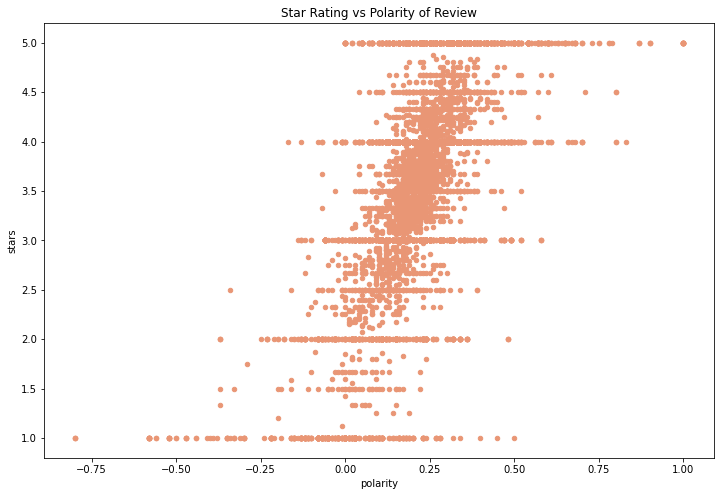

In [276]:
fig, ax = plt.subplots(figsize=(12,8))

reviewstats.plot(kind='scatter', 
                y="stars", 
                x="polarity", 
                ax=ax, 
                color='#e99675')
ax.set(title="Star Rating vs Polarity of Review")


## 2. Correlating restaurant data and household income

In this part, we'll use the census API to download household income data and overlay restaurant locations.

### 2.1 Query the Census API

Use the `cenpy` package to download **median household income in the past 12 months** by census tract from the 2018 ACS 5-year data set for your county of interest.

You have two options to find the correct variable names:
- Search through: https://api.census.gov/data/2018/acs/acs5/variables.html
- Initialize an API connection and use the `.varslike()` function to search for the proper keywords 

At the end of this step, you should have a pandas DataFrame holding the income data for all census tracts within the county being analyzed.

**Hints**

The FIPS codes for the various state/counties are: 

- Pittsburgh
    - PA code: '42'
    - County code: '003' (Allegheny County)
- Cleveland
    - OH code: '39'
    - County code: '035' (Cuyahoga County)
- Charlotte
    - NC code: '37'
    - County code: '119' (Mecklenburg County)

In [4]:
import cenpy
import pandas as pd


In [5]:
import geopandas as gpd

In [6]:

acs = cenpy.remote.APIConnection("ACSDT5Y2018")


In [54]:


acs.varslike("MEDIAN HOUSEHOLD INCOME", by='concept').sort_index()

,label,concept,predicateType,group,limit,predicateOnly,attributes,required
B19013A_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013A,0,NaN,"B19013A_001EA,B19013A_001M,B19013A_001MA",NaN
B19013B_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013B,0,NaN,"B19013B_001EA,B19013B_001M,B19013B_001MA",NaN
B19013C_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013C,0,NaN,"B19013C_001EA,B19013C_001M,B19013C_001MA",NaN
B19013D_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013D,0,NaN,"B19013D_001EA,B19013D_001M,B19013D_001MA",NaN
B19013E_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013E,0,NaN,"B19013E_001EA,B19013E_001M,B19013E_001MA",NaN
B19013F_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013F,0,NaN,"B19013F_001EA,B19013F_001M,B19013F_001MA",NaN
B19013G_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013G,0,NaN,"B19013G_001EA,B19013G_001M,B19013G_001MA",NaN
B19013H_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013H,0,NaN,"B19013H_001EA,B19013H_001M,B19013H_001MA",NaN
B19013I_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013I,0,NaN,"B19013I_001EA,B19013I_001M,B19013I_001MA",NaN
B19013_001E,Estimate!!Median household income in the past ...,MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...,int,B19013,0,NaN,"B19013_001EA,B19013_001M,B19013_001MA",NaN


In [7]:
variable = ["B19013A_001E"]

charlotte_county_code = "119"
NC_state_code = "37"




In [8]:


charlotte = acs.query(
    cols= variable,
    geo_unit="tract:*",
    geo_filter={"state": NC_state_code, 
                "county": charlotte_county_code},
)
charlotte.head()

,B19013A_001E,state,county,tract
0,76996,37,119,002400
1,222361,37,119,002800
2,123906,37,119,006103
3,61353,37,119,006104
4,68750,37,119,006105


### 2.2 Download census tracts from the Census and merge the data from Part 2.1

- Use the `cenpy` to set the correct map service and download census tracts for the desired geography
- Merge the downloaded census tracts with the household income DataFrame, making sure to specify the proper columns to perform the merge on.

In [9]:
#setting mapservice and taking a peek at the diff layers
acs.set_mapservice("tigerWMS_ACS2018")
#acs.mapservice.layers

Connection to American Community Survey: 5-Year Estimates: Detailed Tables 5-Year(ID: https://api.census.gov/data/id/ACSDT5Y2018)
With MapServer: Census ACS 2018 WMS

In [10]:
#I want tracts 
acs.mapservice.layers[8]

(ESRILayer) Census Tracts

In [11]:
#getting only charlotte tracts
where_clause = f"STATE = {NC_state_code} AND COUNTY = {charlotte_county_code}"
charlotte_tracts = acs.mapservice.layers[8].query(where=where_clause)

C:\Users\brine\miniconda3\envs\musa-550-fall-2021\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [12]:
charlotte_tracts.head(n=2)

,MTFCC,OID,GEOID,STATE,COUNTY,TRACT,BASENAME,NAME,LSADC,FUNCSTAT,AREALAND,AREAWATER,CENTLAT,CENTLON,INTPTLAT,INTPTLON,OBJECTID,STGEOMETRY.AREA,STGEOMETRY.LEN,geometry
0,G5020,20758422821264,37119000900,37,119,000900,9,Census Tract 9,CT,S,1125688,0,+35.2373294,-080.8103873,+35.2373294,-080.8103873,42,1.691206e+06,5309.447906,"POLYGON ((-8996856.385 4195861.651, -8996852.0..."
1,G5020,20758422821240,37119001200,37,119,001200,12,Census Tract 12,CT,S,4197667,5067,+35.2262726,-080.7888082,+35.2238478,-080.7885556,99,6.312410e+06,10391.681392,"POLYGON ((-8994905.734 4194379.749, -8994846.2..."


In [13]:
#merging census data with geom data
charlotte_final =charlotte_tracts.merge(
    charlotte,
    left_on=["STATE", "COUNTY", "TRACT"],
    right_on=["state", "county", "tract"],
)

In [14]:
charlotte_final = charlotte_final.rename(columns = {"B19013A_001E":"MedHHInc"})

In [15]:
charlotte_final.head(n=2)

,MTFCC,OID,GEOID,STATE,COUNTY,TRACT,BASENAME,NAME,LSADC,FUNCSTAT,...,INTPTLAT,INTPTLON,OBJECTID,STGEOMETRY.AREA,STGEOMETRY.LEN,geometry,MedHHInc,state,county,tract
0,G5020,20758422821264,37119000900,37,119,000900,9,Census Tract 9,CT,S,...,+35.2373294,-080.8103873,42,1.691206e+06,5309.447906,"POLYGON ((-8996856.385 4195861.651, -8996852.0...",97381,37,119,000900
1,G5020,20758422821240,37119001200,37,119,001200,12,Census Tract 12,CT,S,...,+35.2238478,-080.7885556,99,6.312410e+06,10391.681392,"POLYGON ((-8994905.734 4194379.749, -8994846.2...",123077,37,119,001200


In [16]:
charlotte_final.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### 2.4 Load the restaurants data

Use the `latitude` and `longitude` columns to create a GeoDataFrame after loading the JSON data.

**Notes**

The JSON data is in a "records" format. To load it, you'll need to pass the following keywords: 

- `orient='records'`
- `lines=True`

In [17]:
#bringing data in
rests= pd.read_json(r'C:\Users\brine\Documents\GitHub\MUSA_550\assignment-4-bri-ne\data\restaurants_charlotte.json.gz', orient='records',lines=True )

In [18]:
#getting geom
rests['Coordinates'] = gpd.points_from_xy(rests['longitude'], rests['latitude'])

In [19]:
#setting crs
restsgeo = gpd.GeoDataFrame(rests, 
                            geometry="Coordinates", 
                            crs="EPSG:4326")

In [20]:
restsgeo.head(n=2)

,business_id,latitude,longitude,name,review_count,stars,Coordinates
0,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,POINT (-80.85913 35.09256)
1,BvYU3jvGd0TJ7IyZdfiN2Q,35.156338,-80.831878,Manzetti's Tavern,16,3.5,POINT (-80.83188 35.15634)


### 2.3 Plot a choropleth map of the household income

Use the built-in `geopandas` `plot()` function. 

Be sure to convert to a reasonable CRS first!

In [21]:
#reasonable!
charlotte_final=charlotte_final.to_crs('EPSG:2264')

In [22]:
charlotte_final.crs

<Projected CRS: EPSG:2264>
Name: NAD83 / North Carolina (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - North Carolina - counties of Alamance; Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen; Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell; Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven; Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe; Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford; Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell; Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin; McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nash; New Hanover; Northampton; Onslow; Orange; Pamlico; Pasquotank; Pender; Perquimans; Person; Pitt; Polk; Randolph; Richmond; Robeson; Rockingham; Rowan; Rutherford; Sampson; Scotland; Stanly; Stokes; Sur

In [272]:
#MedHHInc is an object not a number
charlotte_final.dtypes

MTFCC                object
OID                  object
GEOID                object
STATE                object
COUNTY               object
TRACT                object
BASENAME             object
NAME                 object
LSADC                object
FUNCSTAT             object
AREALAND              int64
AREAWATER             int64
CENTLAT              object
CENTLON              object
INTPTLAT             object
INTPTLON             object
OBJECTID              int64
STGEOMETRY.AREA     float64
STGEOMETRY.LEN      float64
geometry           geometry
MedHHInc             object
state                object
county               object
tract                object
dtype: object

In [23]:
#Making MedHHInc into a number
charlotte_final["MedHHInc"]=charlotte_final["MedHHInc"].astype(int)

In [274]:
#just checking
charlotte_final.dtypes

MTFCC                object
OID                  object
GEOID                object
STATE                object
COUNTY               object
TRACT                object
BASENAME             object
NAME                 object
LSADC                object
FUNCSTAT             object
AREALAND              int64
AREAWATER             int64
CENTLAT              object
CENTLON              object
INTPTLAT             object
INTPTLON             object
OBJECTID              int64
STGEOMETRY.AREA     float64
STGEOMETRY.LEN      float64
geometry           geometry
MedHHInc              int32
state                object
county               object
tract                object
dtype: object

In [275]:
#there are negative values in the MedHHinc col
sorted_char = charlotte_final.sort_values(by="MedHHInc", ascending=True)
sorted_char.head(n=3)

,MTFCC,OID,GEOID,STATE,COUNTY,TRACT,BASENAME,NAME,LSADC,FUNCSTAT,...,INTPTLAT,INTPTLON,OBJECTID,STGEOMETRY.AREA,STGEOMETRY.LEN,geometry,MedHHInc,state,county,tract
230,G5020,207583717416506,37119980200,37,119,980200,9802,Census Tract 9802,CT,S,...,+35.1141093,-080.9312035,73875,1.676185e+07,21255.024471,"POLYGON ((1414483.070 494691.204, 1414542.418 ...",-666666666,37,119,980200
106,G5020,20758422808413,37119004800,37,119,004800,48,Census Tract 48,CT,S,...,+35.2574751,-080.8492145,13906,4.902549e+06,9932.405875,"POLYGON ((1445768.645 550861.386, 1445776.539 ...",-666666666,37,119,004800
48,G5020,20758422808391,37119980300,37,119,980300,9803,Census Tract 9803,CT,S,...,+35.2169288,-080.8379686,1890,7.252377e+05,3541.589122,"POLYGON ((1449422.342 539784.560, 1449902.222 ...",-666666666,37,119,980300


In [24]:
#Getting rid of them
charlotte_final = charlotte_final.loc[charlotte_final["MedHHInc"]>0]
sorted_char = charlotte_final.sort_values(by="MedHHInc", ascending=True)
sorted_char.head(n=3)

,MTFCC,OID,GEOID,STATE,COUNTY,TRACT,BASENAME,NAME,LSADC,FUNCSTAT,...,INTPTLAT,INTPTLON,OBJECTID,STGEOMETRY.AREA,STGEOMETRY.LEN,geometry,MedHHInc,state,county,tract
132,G5020,207583717416395,37119005609,37,119,005609,56.09,Census Tract 56.09,CT,S,...,+35.3223377,-080.7200438,53454,4.886382e+06,10234.456679,"POLYGON ((1482790.412 576428.207, 1482903.335 ...",16818,37,119,005609
160,G5020,207583717416362,37119005305,37,119,005305,53.05,Census Tract 53.05,CT,S,...,+35.2722436,-080.7849359,54220,3.407783e+06,8621.656612,"POLYGON ((1464274.185 556845.578, 1464283.633 ...",21000,37,119,005305
226,G5020,207583717417056,37119005604,37,119,005604,56.04,Census Tract 56.04,CT,S,...,+35.3040262,-080.7390968,64404,8.605202e+06,14232.076213,"POLYGON ((1475140.046 564533.561, 1475282.673 ...",27552,37,119,005604


In [25]:
import contextily as cx

[Text(0.5, 1.0, 'Median Household Income in Mecklenburg County, NC')]

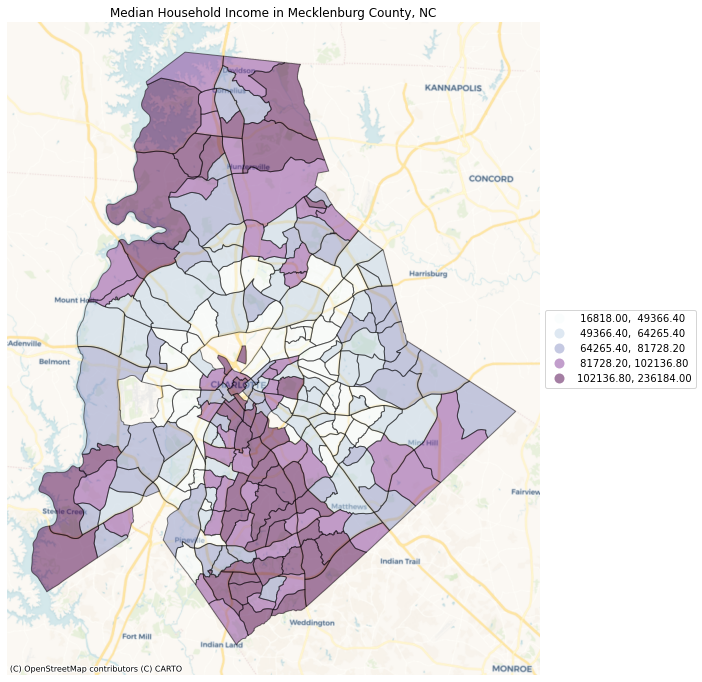

In [26]:

ax = charlotte_final.plot( 
                     column="MedHHInc",
                     figsize=(12, 12),
                     legend=True,
                     alpha=0.5,
                     edgecolor='k',
                     cmap='BuPu',
                     scheme='QUANTILES',
                     legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, crs=charlotte_final.crs)
ax.set_axis_off()
ax.set(title="Median Household Income in Mecklenburg County, NC")

### 2.5 Overlay restaurants on the income map

Overlay the restaurants and color the points according to the 'stars' column. 

You can use the 'coolwarm' color map: blue points will have below-average reviews and red points will have above-average stars. 

**Hint**

You can use the `.geometry.total_bounds` attribute to get the axes limits of the county's census tracts. 

```python
[xmin, ymin, xmax, ymax] = income.geometry.total_bounds
```

You can then use these limits to set the matplotlib plot limits accordingly.

In [29]:
restsgeo.crs

<Projected CRS: EPSG:2264>
Name: NAD83 / North Carolina (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - North Carolina - counties of Alamance; Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen; Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell; Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven; Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe; Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford; Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell; Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin; McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nash; New Hanover; Northampton; Onslow; Orange; Pamlico; Pasquotank; Pender; Perquimans; Person; Pitt; Polk; Randolph; Richmond; Robeson; Rockingham; Rowan; Rutherford; Sampson; Scotland; Stanly; Stokes; Sur

In [28]:
#converting to same CRS
restsgeo=restsgeo.to_crs(charlotte_final.crs)


In [30]:
#spatial join with geopandas
char_rests = gpd.sjoin(restsgeo, charlotte_final, op='intersects', how='inner')

In [31]:
char_rests.tail(n=2)

,business_id,latitude,longitude,name,review_count,stars,Coordinates,index_right,MTFCC,OID,...,CENTLON,INTPTLAT,INTPTLON,OBJECTID,STGEOMETRY.AREA,STGEOMETRY.LEN,MedHHInc,state,county,tract
2508,MfmBd9C7tUfOkGu2eJpK2w,35.293211,-80.837930,Sunflower Family Restaurant,53,4.5,POINT (1451608.760 566718.703),122,G5020,207583717416617,...,-080.8276176,+35.2993564,-080.8204775,38482,9.276942e+06,14142.719690,71750,37,119,005403
2587,8jR1NYx1xPcz2_ocm1o8IA,35.203733,-80.835724,Philadelphia Deli Restaurants,31,3.5,POINT (1451664.621 534147.159),120,G5020,207583717416333,...,-080.8309136,+35.2004703,-080.8309136,37966,2.508229e+06,7775.291596,107431,37,119,002701


In [32]:
charlotte_final.head(n=2)

,MTFCC,OID,GEOID,STATE,COUNTY,TRACT,BASENAME,NAME,LSADC,FUNCSTAT,...,INTPTLAT,INTPTLON,OBJECTID,STGEOMETRY.AREA,STGEOMETRY.LEN,geometry,MedHHInc,state,county,tract
0,G5020,20758422821264,37119000900,37,119,000900,9,Census Tract 9,CT,S,...,+35.2373294,-080.8103873,42,1.691206e+06,5309.447906,"POLYGON ((1456528.978 545436.004, 1456540.882 ...",97381,37,119,000900
1,G5020,20758422821240,37119001200,37,119,001200,12,Census Tract 12,CT,S,...,+35.2238478,-080.7885556,99,6.312410e+06,10391.681392,"POLYGON ((1461688.677 541383.635, 1461860.124 ...",123077,37,119,001200


In [33]:
# still reasonable!
char_rests.crs

<Projected CRS: EPSG:2264>
Name: NAD83 / North Carolina (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - North Carolina - counties of Alamance; Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen; Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell; Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven; Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe; Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford; Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell; Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin; McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nash; New Hanover; Northampton; Onslow; Orange; Pamlico; Pasquotank; Pender; Perquimans; Person; Pitt; Polk; Randolph; Richmond; Robeson; Rockingham; Rowan; Rutherford; Sampson; Scotland; Stanly; Stokes; Sur

In [34]:
# still reasonable!
charlotte_final.crs

<Projected CRS: EPSG:2264>
Name: NAD83 / North Carolina (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - North Carolina - counties of Alamance; Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen; Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell; Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven; Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe; Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford; Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell; Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin; McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nash; New Hanover; Northampton; Onslow; Orange; Pamlico; Pasquotank; Pender; Perquimans; Person; Pitt; Polk; Randolph; Richmond; Robeson; Rockingham; Rowan; Rutherford; Sampson; Scotland; Stanly; Stokes; Sur

In [35]:
[xmin, ymin, xmax, ymax] = charlotte_final.geometry.total_bounds

In [36]:
char_rests['stars'].isnull().sum()

0

In [37]:
char_rests['stars'].notnull().sum()

2598

In [38]:
char_rests = char_rests[char_rests['stars'].notna()]
char_rests.count()

business_id        2598
latitude           2598
longitude          2598
name               2598
review_count       2598
stars              2598
Coordinates        2598
index_right        2598
MTFCC              2598
OID                2598
GEOID              2598
STATE              2598
COUNTY             2598
TRACT              2598
BASENAME           2598
NAME               2598
LSADC              2598
FUNCSTAT           2598
AREALAND           2598
AREAWATER          2598
CENTLAT            2598
CENTLON            2598
INTPTLAT           2598
INTPTLON           2598
OBJECTID           2598
STGEOMETRY.AREA    2598
STGEOMETRY.LEN     2598
MedHHInc           2598
state              2598
county             2598
tract              2598
dtype: int64

In [41]:

# Extract stars
stars = char_rests["stars"]

# Plot
fig, ax = plt.subplots(figsize=(8,8))
ax.set_axis_off()
ax.set_aspect("equal")

# Plot the first city in the joined data frame (Vatican City)
# Use the same axes by passing in the ax=ax keyword
stars.plot(ax=ax, color='red')  



<AxesSubplot:>

In [42]:
char_rests.tail()

,business_id,latitude,longitude,name,review_count,stars,Coordinates,index_right,MTFCC,OID,...,CENTLON,INTPTLAT,INTPTLON,OBJECTID,STGEOMETRY.AREA,STGEOMETRY.LEN,MedHHInc,state,county,tract
2270,JFyhCn3DUlHAvVb97iugXw,35.134839,-80.780762,Gleiberman's Kosher Mart & Restaurant,6,3.5,POINT (1467630.391 508778.793),55,G5020,20758422821334,...,-080.7808639,+35.1467548,-080.7795670,1449,7.016597e+06,11613.693047,106932,37,119,002004
2496,HBvaHgTOvOi6Ir_qmpCazA,35.135712,-80.778823,Joel's Pizza,3,4.5,POINT (1468215.783 509085.952),55,G5020,20758422821334,...,-080.7808639,+35.1467548,-080.7795670,1449,7.016597e+06,11613.693047,106932,37,119,002004
2521,7ig1QGYCgJV-L_5iMtVdgw,35.135164,-80.778632,Gleiberman's Kosher Mart & Restaurant,21,3.0,POINT (1468269.274 508885.528),55,G5020,20758422821334,...,-080.7808639,+35.1467548,-080.7795670,1449,7.016597e+06,11613.693047,106932,37,119,002004
2508,MfmBd9C7tUfOkGu2eJpK2w,35.293211,-80.837930,Sunflower Family Restaurant,53,4.5,POINT (1451608.760 566718.703),122,G5020,207583717416617,...,-080.8276176,+35.2993564,-080.8204775,38482,9.276942e+06,14142.719690,71750,37,119,005403
2587,8jR1NYx1xPcz2_ocm1o8IA,35.203733,-80.835724,Philadelphia Deli Restaurants,31,3.5,POINT (1451664.621 534147.159),120,G5020,207583717416333,...,-080.8309136,+35.2004703,-080.8309136,37966,2.508229e+06,7775.291596,107431,37,119,002701


In [310]:
charlotte_final.tail()

,MTFCC,OID,GEOID,STATE,COUNTY,TRACT,BASENAME,NAME,LSADC,FUNCSTAT,...,INTPTLAT,INTPTLON,OBJECTID,STGEOMETRY.AREA,STGEOMETRY.LEN,geometry,MedHHInc,state,county,tract
227,G5020,207583717416693,37119005518,37,119,005518,55.18,Census Tract 55.18,CT,S,...,+35.3617767,-080.7682068,64840,1.213364e+07,14639.683942,"POLYGON ((1467120.786 592769.150, 1467130.800 ...",76107,37,119,005518
228,G5020,207583717417120,37119005845,37,119,005845,58.45,Census Tract 58.45,CT,S,...,+35.0537552,-080.7838289,64405,7.185479e+06,15348.609062,"POLYGON ((1460449.481 471911.275, 1460649.611 ...",100583,37,119,005845
229,G5020,207583717417129,37119006104,37,119,006104,61.04,Census Tract 61.04,CT,S,...,+35.3104491,-080.9089976,64406,2.962252e+07,22792.038347,"POLYGON ((1419650.110 576017.760, 1419812.617 ...",61353,37,119,006104
231,G5020,207583717416977,37119005846,37,119,005846,58.46,Census Tract 58.46,CT,S,...,+35.0394047,-080.7835757,74046,6.645171e+06,12152.519283,"POLYGON ((1459824.423 469939.218, 1459956.565 ...",179022,37,119,005846
232,G5020,207583717417116,37119005838,37,119,005838,58.38,Census Tract 58.38,CT,S,...,+35.0238628,-080.8481842,73912,1.076426e+07,15112.516389,"POLYGON ((1440255.749 473722.997, 1440440.583 ...",98607,37,119,005838


In [313]:
charlotte_final.crs

<Projected CRS: EPSG:2264>
Name: NAD83 / North Carolina (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - North Carolina - counties of Alamance; Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen; Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell; Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven; Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe; Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford; Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell; Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin; McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nash; New Hanover; Northampton; Onslow; Orange; Pamlico; Pasquotank; Pender; Perquimans; Person; Pitt; Polk; Randolph; Richmond; Robeson; Rockingham; Rowan; Rutherford; Sampson; Scotland; Stanly; Stokes; Sur

In [314]:
char_rests.crs

<Projected CRS: EPSG:2264>
Name: NAD83 / North Carolina (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - North Carolina - counties of Alamance; Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen; Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell; Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven; Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe; Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford; Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell; Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin; McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nash; New Hanover; Northampton; Onslow; Orange; Pamlico; Pasquotank; Pender; Perquimans; Person; Pitt; Polk; Randolph; Richmond; Robeson; Rockingham; Rowan; Rutherford; Sampson; Scotland; Stanly; Stokes; Sur

In [ ]:


base = charlotte_final.plot( 
                     column="MedHHInc",
                     figsize=(12, 12),
                     legend=True,
                     alpha=0.5,
                     edgecolor='k',
                     cmap='BuPu',
                     scheme='QUANTILES',
                     legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})



char_rests["stars"].plot(ax=base, marker='o',  color='red', markersize=5)


#cx.add_basemap(base, source=cx.providers.CartoDB.Voyager, crs=charlotte_final.crs)
base.set_axis_off()
base.set(title="Median Household Income in Mecklenburg County, NC")
#plt.xlim([xmin, xmax])
#plt.ylim([ymin, ymax])



[Text(0.5, 1.0, 'Median Household Income in Mecklenburg County, NC')]

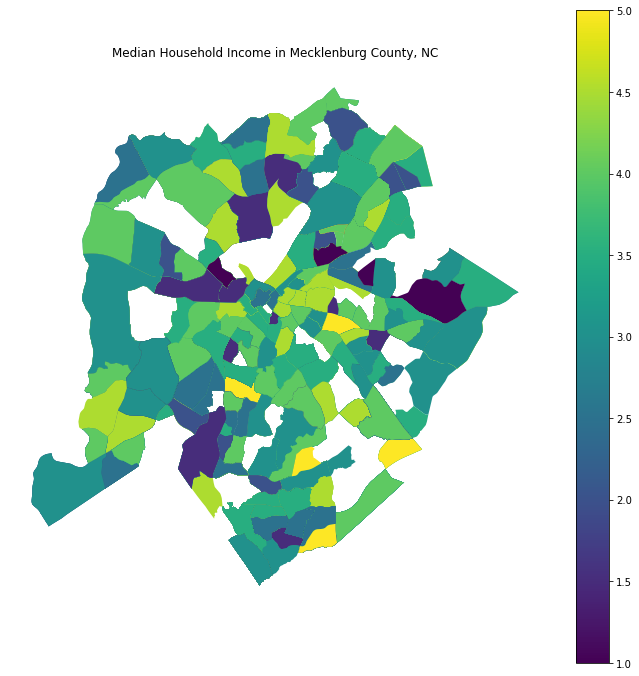

In [205]:
ax0 = char_rests.plot( 
                     column="stars",
                     figsize=(12, 12),
                     legend=True)
#,
                     #legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

#cx.add_basemap(ax0, source=cx.providers.CartoDB.Voyager, crs=charlotte_final.crs)
ax0.set_axis_off()
ax0.set(title="Median Household Income in Mecklenburg County, NC")

### 2.6 Comparing polarity vs. stars geographically

- Merge the restaurants GeoDataFrame with the DataFrame with the 'polarity' column for each review. 
- Make a side-by-side plot with two columns: one subplot shows hex bins giving the polarity of the restaurant review and the other shows hex bins giving the number of stars

As we saw in Section 1, you should see strong correlation between the two subplots. 

**Hints**
- The 'business_id' column should be present in both the data frames holding review data and restaurant data.
- See the `plt.subplots()` function for creating a figure with 2 subplots.
